In [2]:
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from skimage.io import imread
from skimage.transform import resize

In [3]:

# 定义函数来加载和预处理图像
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = imread(os.path.join(folder, filename), as_gray=True)
        img_resized = resize(img, (64, 64))  # 调整图像大小为64x64
        images.append(img_resized.flatten())  # 将图像展平并添加到列表中
    return np.array(images)

# 加载真实图像和生成的图像
cats_folder = "/Users/fengqiuyi/Desktop/GAN/cats-faces-64x64-for-generative-models/resized"
fake_folder = "/Users/fengqiuyi/Desktop/GAN/cats-faces-64x64-for-generative-models/fake"
real_images = load_images(cats_folder)
generated_images = load_images(fake_folder)


In [4]:

# 创建PCA对象并拟合真实图像
pca = PCA(n_components=50)  # 设置PCA的主成分数量
pca.fit(real_images)

# 使用PCA转换真实和生成的图像
real_images_pca = pca.transform(real_images)
generated_images_pca = pca.transform(generated_images)


In [7]:
from sklearn.model_selection import train_test_split

In [8]:

# 划分数据集为训练集和测试集
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(real_images_pca, np.ones(len(real_images)), test_size=0.2, random_state=42)
X_generated_train, X_generated_test, y_generated_train, y_generated_test = train_test_split(generated_images_pca, np.zeros(len(generated_images)), test_size=0.2, random_state=42)

# 合并训练集和测试集
X_train = np.vstack((X_real_train, X_generated_train))
y_train = np.hstack((y_real_train, y_generated_train))
X_test = np.vstack((X_real_test, X_generated_test))
y_test = np.hstack((y_real_test, y_generated_test))

# 创建随机森林分类器并拟合数据
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# 使用测试集进行预测
predictions = rf_classifier.predict(X_test)

# 计算准确率等性能指标
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9044660194174757


In [10]:
from sklearn.metrics import precision_score, f1_score, roc_auc_score, log_loss

# 计算精确度
precision = precision_score(y_test, predictions)

# 计算F1分数
f1 = f1_score(y_test, predictions)

# 计算AUC-ROC
auc_roc = roc_auc_score(y_test, predictions)

# 计算对数损失
# 请确保你的分类器支持predict_proba方法
if hasattr(rf_classifier, "predict_proba"):
    probabilities = rf_classifier.predict_proba(X_test)
    logloss = log_loss(y_test, probabilities)
else:
    logloss = None

print("Precision:", precision)
print("F1 Score:", f1)
print("AUC-ROC:", auc_roc)
print("Log Loss:", logloss)


Precision: 0.8904230317273796
F1 Score: 0.9249313396399146
AUC-ROC: 0.887861111111111
Log Loss: 0.31906148246583554


In [12]:
    
def show_pic(p):
# 使用PCA的逆变换将特征向量转换为原始图像
    real_images_pca_restored = pca.inverse_transform(p)

    # 将展平的图像重新转换为原始图像的形状
    real_images_restored = real_images_pca_restored.reshape((-1, 64, 64))

    # 显示一张转换后的图像（这里假设使用matplotlib进行显示）
    import matplotlib.pyplot as plt

    plt.imshow(real_images_restored[0], cmap='gray')
    plt.axis('off')
    plt.show()


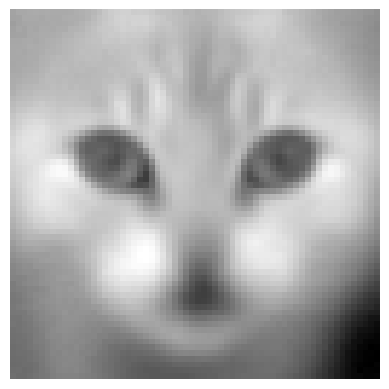

In [14]:
show_pic(real_images_pca[0])